# Gun Violence in USA

### The following project will enlight the gun violence in the USA, its effects on peopel's lives etc

## 1. Data insights

##### Importing some of the basic liberaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # used to fill both numerical and categorical missing values in a dataset

##### Reading the data

In [3]:
r_file=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
r_file.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

## 2. Data info Extraction

##### Information about the data

In [4]:
r_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

## 3. Data Modification

##### A look at null values

In [5]:
r_file.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

##### Finding out the percentage of missing values in the data frame

In [6]:


total_missing=r_file.isna().sum()
count_missing=r_file.isna().count()

per_missing=(total_missing/count_missing)*100
grp_per_missing=pd.concat([total_missing, per_missing], axis=1)
grp_per_missing

,0,1
incident_id,0,0.000000
date,0,0.000000
state,0,0.000000
city_or_county,0,0.000000
address,16497,6.883013
n_killed,0,0.000000
n_injured,0,0.000000
incident_url,0,0.000000
source_url,468,0.195263
incident_url_fields_missing,0,0.000000


## Results:
##### Since, from above result, paticipant_relationship has the highest missing % as 93 and location_description has 82. Along with this, incident_url_fields_missing, and source_url also looks like of no use. Therefore, we should drop these entities.
#### ALSO
##### 1. r_file['gun_stolen'].unique()
##### running above code will result in almost UNKNOWN fields, therefore, we should drop it too
##### 2. r_file.drop(['gun_stolen'], axis=1, inplace=True)
##### running above code will tell us the age and group(adult, child etc). Therefore, we should also drop it bcz we already have a column of age through which we can also tell the group.

##### Dropping some of the unnecessary columns

In [7]:
r_file.drop(['participant_relationship', 'location_description', 'incident_url_fields_missing', 'participant_age_group', 'state_house_district', 'state_senate_district', 'latitude', 'longitude', ], axis=1, inplace=True)

# r_file.columns

In [8]:
r_file.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'n_guns_involved',
       'notes', 'participant_age', 'participant_gender', 'participant_name',
       'participant_status', 'participant_type', 'sources'],
      dtype='object')

##### Filling the missing fields

In [9]:
miss_cols=['address', 'congressional_district', 'participant_name', 'source_url', 'gun_stolen', 'gun_type']
miss=r_file[miss_cols]

imputer=SimpleImputer(missing_values= np.nan, strategy='most_frequent')
r_file[miss_cols]=imputer.fit_transform(miss)



In [10]:
# r_file.isnull().sum()

In [11]:
r_file['n_guns_involved']=r_file['n_guns_involved'].fillna(r_file['n_guns_involved'].mean())


# now filling other missing values with value 'unknown'
miss_unk=['notes','participant_age','participant_gender', 'participant_type', 'participant_status', 'incident_characteristics', 'sources']
unk=r_file[miss_unk]

imputer=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
r_file[miss_unk]=imputer.fit_transform(unk)

s=r_file.isna().sum()
c=r_file.isna().count()
p=(s/c)*100
p


incident_id                 0.0
date                        0.0
state                       0.0
city_or_county              0.0
address                     0.0
n_killed                    0.0
n_injured                   0.0
incident_url                0.0
source_url                  0.0
congressional_district      0.0
gun_stolen                  0.0
gun_type                    0.0
incident_characteristics    0.0
n_guns_involved             0.0
notes                       0.0
participant_age             0.0
participant_gender          0.0
participant_name            0.0
participant_status          0.0
participant_type            0.0
sources                     0.0
dtype: float64

##### Creating a new column which will include data of killed and injured people

In [12]:
# creating a new column of total number of people affected by adding n_killed in n_injured

r_file['Total_affected']= r_file['n_killed']+r_file['n_injured'] # new column will be added at the end of data frame
r_file['Total_affected'].count() # will result 0

239677

In [13]:
r_file[['Total_affected']].count()

Total_affected    239677
dtype: int64

## 5. Graphical Representations

##### Bar chart to show the total number of affceted people state_wise (HIGH CRIME RATE)

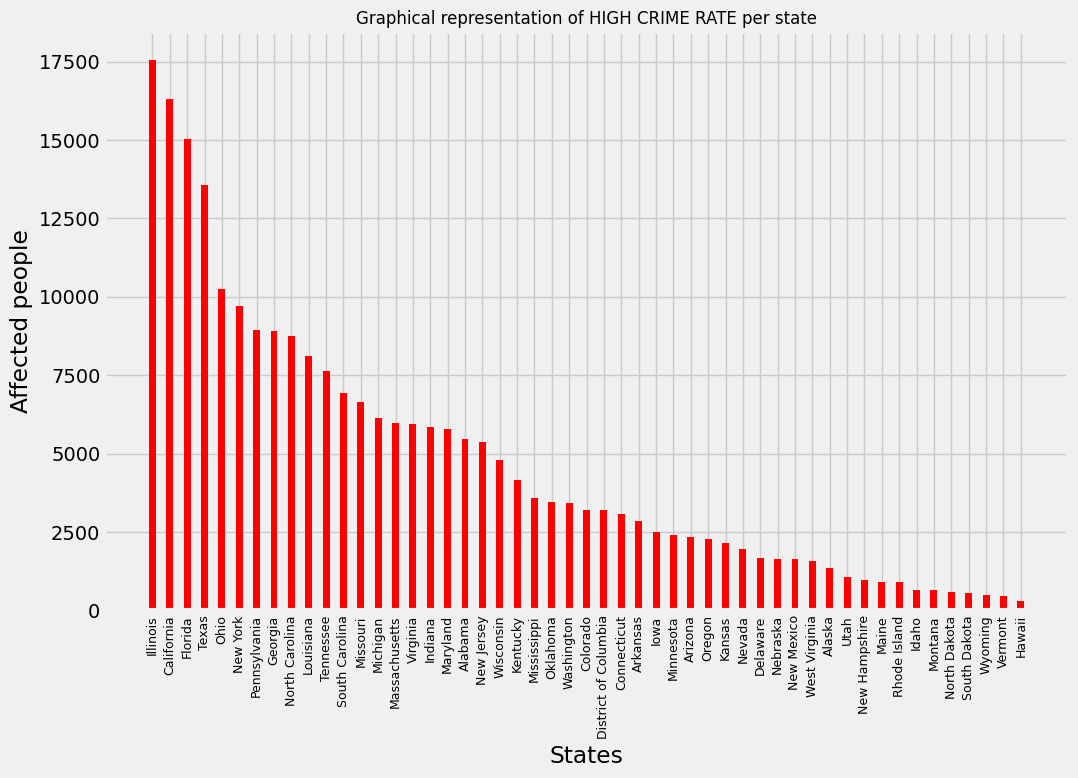

In [14]:
# grouping together the states according to total affected people 
from turtle import color

grp_states=r_file.groupby('state').size().reset_index().sort_values(by=0, ascending=False)
grp_states.columns=['state', 'Total_affected']
#____________________________________________________________________________________________

# plotting
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,8)) # 11=horizontal length, 8=vertical stretch

plt.bar(data=grp_states, x='state', height='Total_affected', color='r', width=0.4)
plt.title('Graphical representation of HIGH CRIME RATE per state', fontdict={'fontsize':12})
plt.xlabel('States')
plt.ylabel('Affected people')
plt.xticks(fontsize=9, ha='center', rotation=90)
plt.tight_layout()
plt.show()

##### Pie char reperesntation of HIGH CRIME RATE in cities

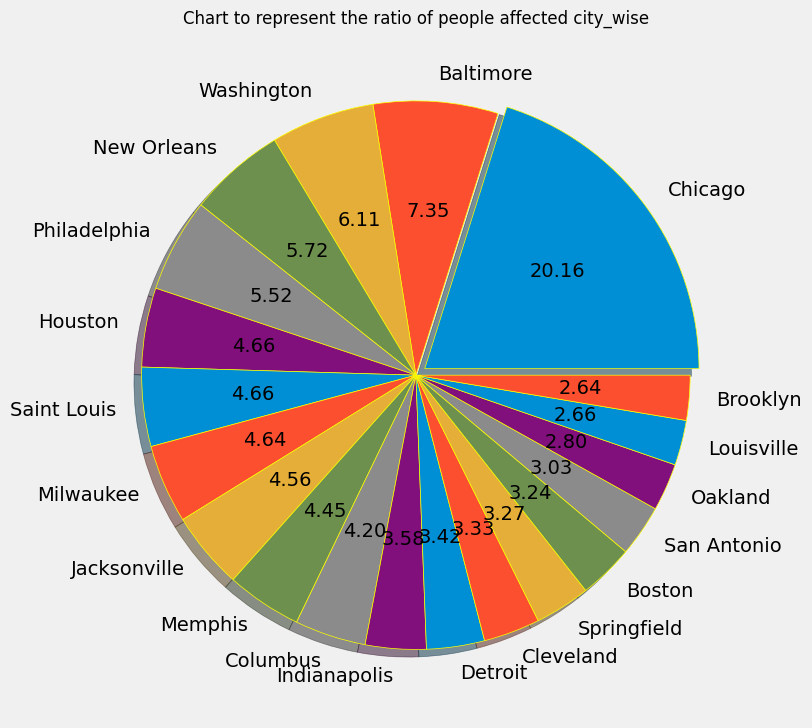

In [15]:
# making use of previously defined data

grp_states_k_i=r_file.groupby('city_or_county').size().reset_index().sort_values(by=0, ascending=False)
grp_states_k_i.columns=['City', 'Total_affected']

name_cities=np.array(grp_states_k_i['City'].head(20)).flatten()
tot_affected=np.array(grp_states_k_i['Total_affected'].head(20)).flatten()
expl=[0.04, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7.5))

plt.pie(tot_affected, labels=name_cities, explode=expl, autopct="%1.2f",wedgeprops={'edgecolor':'Yellow'}, shadow=True)
plt.title('Chart to represent the ratio of people affected city_wise', fontdict={'fontsize':12})
plt.tight_layout()
plt.show()

## Results of Graphs:
##### From above two graphs, it can be seen that the total number of affected people are the highest in Illinois state as compared to other and the highest number of people affecetd is of Chicago city which is the city of Illinois state



## Graph to compare the people killed, injured and total affected. The Graph is sorted according to the people killed, injured and affected in ascending order upto 20 values

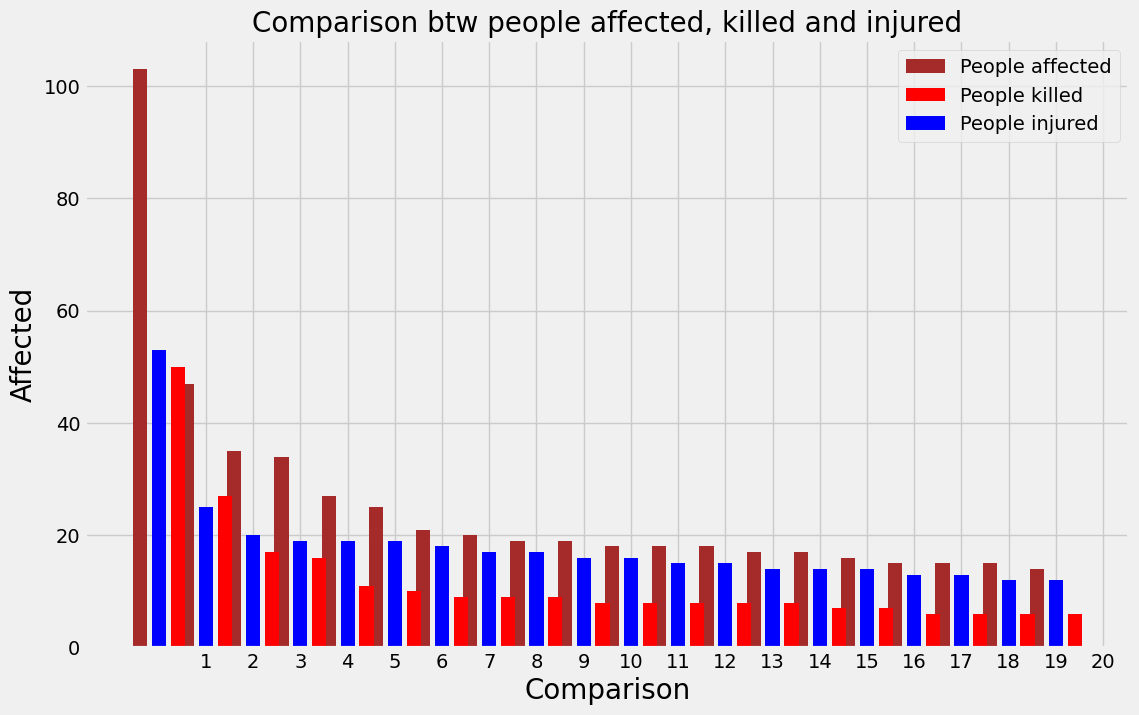

In [16]:
killed=np.array(r_file['n_killed'].sort_values(ascending=False).head(20))

injured=np.array(r_file['n_injured'].sort_values(ascending=False).head(20))

affected=np.array(r_file['Total_affected'].sort_values(ascending=False).head(20))

i=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
pos=np.arange(len(i))

width = 0.4

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7.5))
plt.bar(pos - width, affected , width=0.3, color="Brown", label="People affected")

plt.bar(pos+width, killed, width=0.3, color="Red", label="People killed")

plt.bar(pos, injured, width=0.3, color="b", label="People injured")

plt.title("Comparison btw people affected, killed and injured", fontdict={"fontsize": 20})
plt.xlabel("Comparison", fontdict={"fontsize": 20})
plt.ylabel("Affected", fontdict={"fontsize": 20})

plt.xticks(ticks=i)

plt.legend()  # always used whenever labels are used
plt.show()


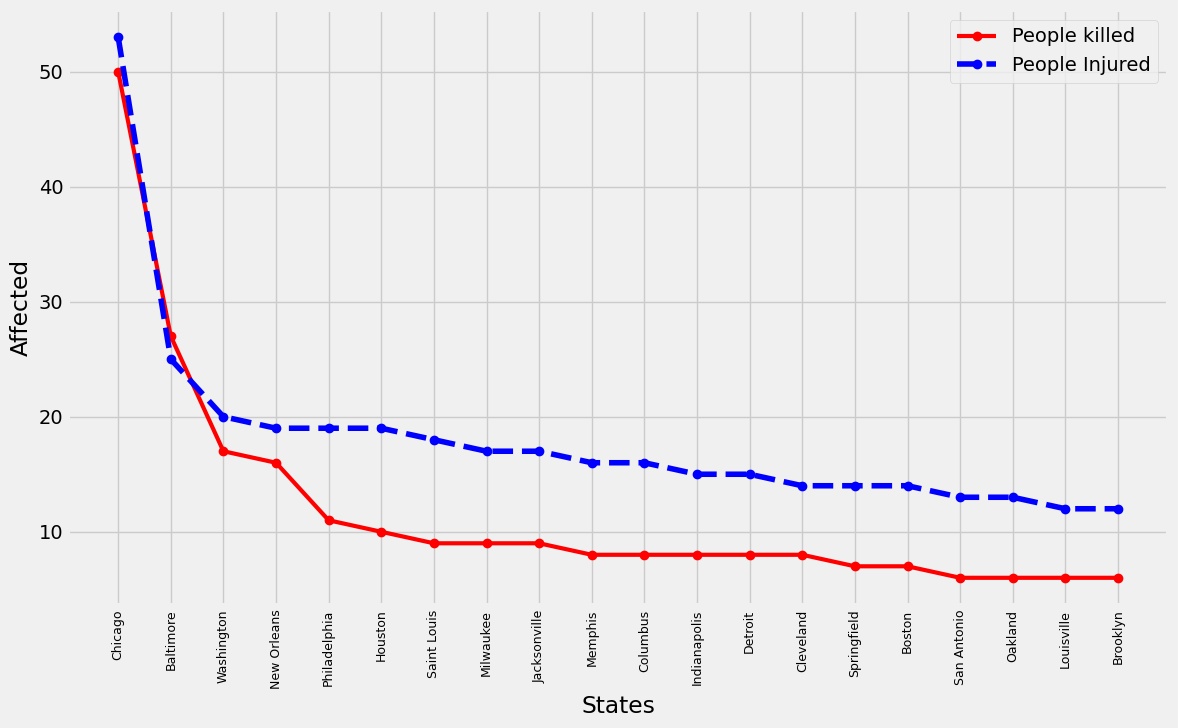

In [17]:
# staes=r_file['']

killed=np.array(r_file['n_killed'].sort_values(ascending=False).head(20))

injured=np.array(r_file['n_injured'].sort_values(ascending=False).head(20))

grp_states

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7.5))
plt.plot(name_cities, killed, label="People killed", marker='o', linewidth=3, color="r")
plt.plot(name_cities, injured, label="People Injured" , marker='o', linestyle='--',color='b')
# plt.plot(ages, js_devs, label='js devs', color='g', marker='o')
plt.xlabel("States")
plt.ylabel("Affected")
plt.xticks(fontsize=9, ha='center', rotation=90)
# plt.title("The median salary of devs")
plt.tight_layout()
plt.legend()
plt.show()


## Result:
##### from above comparison graph, it is clear that the rate f injured is always greater than that of killed